In [11]:
# Import required libraries and dependencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [57]:
train_data = pd.read_csv('Resources/GME_data.csv')
training_set = train_data.iloc[:, 1:2].values

In [81]:
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21,3.952500,4.087500,3.820000,3.882500,3.882500,39504400
1,2020-12-22,4.055000,5.010000,4.037500,4.865000,4.865000,122610800
2,2020-12-23,5.042500,5.587500,4.782500,5.142500,5.142500,103321200
3,2020-12-24,5.252500,5.370000,4.987500,5.037500,5.037500,25048800
4,2020-12-28,5.327500,5.492500,5.087500,5.247500,5.247500,35863600
...,...,...,...,...,...,...,...
414,2022-08-15,39.750000,40.389999,38.810001,39.680000,39.680000,5243100
415,2022-08-16,39.169998,45.529999,38.599998,42.189999,42.189999,23602800
416,2022-08-17,42.180000,44.360001,40.410000,40.520000,40.520000,9766400
417,2022-08-18,39.270000,40.070000,37.340000,37.930000,37.930000,8145400


In [59]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [82]:
X_train = []
y_train = []

for i in range(20, 419):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [83]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
13/13 [==============================] - 5s 25ms/step - loss: 0.0602
Epoch 2/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0206
Epoch 3/100
13/13 [==============================] - 0s 27ms/step - loss: 0.0172
Epoch 4/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0166
Epoch 5/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0164
Epoch 6/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0168
Epoch 7/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0165
Epoch 8/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0164
Epoch 9/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0163
Epoch 10/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0162
Epoch 11/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0152
Epoch 12/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0155
Epoch 13/100
13/13 [=====

In [84]:
dataset_test = pd.read_csv('Resources/GME_data.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [95]:
dataset_total = pd.concat((train_data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20, 440):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

14/14 [==============================] - 0s 6ms/step


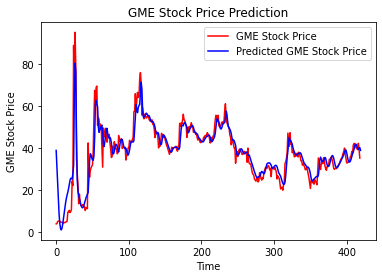

In [96]:
plt.plot(real_stock_price, color = 'red', label = 'GME Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted GME Stock Price')
plt.title('GME Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GME Stock Price')
plt.legend()
plt.show()